In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.api as sm

In [2]:
data_source = '../Money-Mavericks/data/data.csv'
#data_source = './data/data.csv'
df = pd.read_csv(data_source)

In [3]:
X = df[["Education Budget", "Unemployment Rate", "Population Estimate", "Year"]]

In [4]:
X = pd.get_dummies(data=X, drop_first=True)
print(X.shape)
print(X.head())

(251, 4)
   Education Budget  Unemployment Rate  Population Estimate  Year
0      2.729781e+09                6.1              4852347  2015
1      4.152387e+08                6.5               737498  2015
2      6.241051e+09                6.1              6829676  2015
3      1.334963e+09                5.2              2978048  2015
4      1.672784e+10                6.2             38918045  2015


In [5]:
y = df["SNAPS cost"]
print(y)

0      1341906577
1       168054411
2      1459584642
3       648769562
4      7528039778
          ...    
246    1002380166
247    1192380309
248     397899950
249     778373061
250      36277115
Name: SNAPS cost, Length: 251, dtype: int64


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(200, 4)
(51, 4)
(200,)
(51,)


In [7]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [8]:
print(model.intercept_)

52822728799.17006


In [9]:
predictions = model.predict(X_test)
print(predictions)

[ 1.87304600e+09  9.91160417e+08  1.15969141e+09  3.80546434e+09
  1.59583303e+09  1.10761985e+09  8.09055118e+08  7.50735336e+08
  2.29163478e+09  8.26710855e+08  1.48305566e+09  5.19379543e+09
  3.72259638e+07  1.35936139e+09  6.53318914e+08  9.54652373e+08
  2.03515479e+09  1.17470046e+09  1.47065755e+08  8.73633061e+07
  7.49635455e+09  3.96780180e+08  2.08021697e+09  1.08177175e+09
  4.40021785e+08  2.51240829e+09  1.47010300e+09  1.04778248e+09
  1.89007531e+09  3.87976235e+08  6.93385914e+08  3.84030533e+09
  1.20976523e+09  1.46432781e+09  1.87520116e+08  5.20787486e+09
  2.33580857e+09 -2.51507261e+07  2.57767280e+09  8.95059125e+08
  2.66585681e+09  9.78118295e+08  6.15995657e+08  2.76256907e+09
  3.59234734e+08  5.13682213e+06  7.67891999e+07  4.00146230e+09
  1.25174127e+09  7.84225151e+08  5.27910634e+08]


<Axes: xlabel='SNAPS cost'>

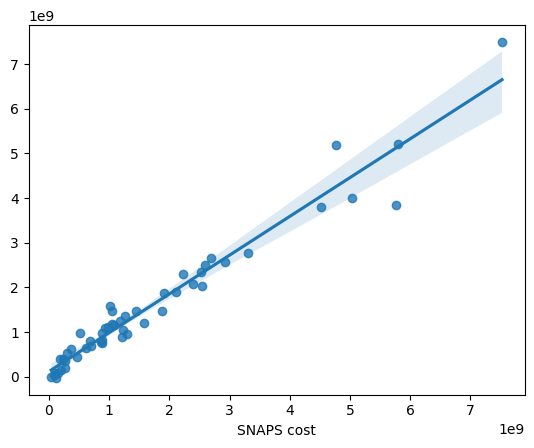

In [10]:
sns.regplot(x=y_test,y=predictions)

In [11]:
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:             SNAPS cost   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     874.2
Date:                Fri, 24 Mar 2023   Prob (F-statistic):          2.79e-123
Time:                        12:58:15   Log-Likelihood:                -4196.4
No. Observations:                 200   AIC:                             8403.
Df Residuals:                     195   BIC:                             8419.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5.282e+10   3